Lucy Turner
ACCT 464: Auditing
IDEA part 3

### Data Initialization

Loading data into pandas.DataFrame objects, data was previously exported to excel and then converted to a .csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cust_df = pd.read_csv('cust_bal_lim.csv')
acc_rec_df = pd.read_csv('acc_rec.csv')

Here I set up a series to hold only the 'GROSS_AMT' column of the DataFrame.

I kept a copy of the sorted Series with individual indexes in case I need to find individual customer IDs later to match with receivables. 

I also formed a separate Series with only the top 10 transactions.

In [2]:
ar_ser = acc_rec_df['GROSS_AMT'].copy()
ar_ser = ar_ser.sort_values(ascending=False)
positive_ar_df = ar_ser.reset_index()
positive_ar = positive_ar_df['GROSS_AMT'].copy()
top_10_ser = positive_ar.iloc[0:10].copy()
print(top_10_ser)
print(ar_ser.sort_values(ascending=False).iloc[0:10].sum() / ar_ser.sum())

0    18349.53
1    17307.59
2    16587.03
3    16095.58
4    13844.67
5    13479.34
6    13001.28
7    10564.84
8    10125.00
9    10125.00
Name: GROSS_AMT, dtype: float64
0.3777330324429074


Here we store the sum of the top 10 transactions and other transactions, as well as the percent of total value they make up. 

In [3]:
top_10 = positive_ar.iloc[0:10].sum()
other_ar = positive_ar.iloc[11:].sum()
top_10_p = round(top_10 / positive_ar.sum(), 3)
other_ar_p = round(other_ar / positive_ar.sum(), 3)

### Statistical Analysis

Here we will print some descriptive statistics to inform further visualization decisions

In [4]:
def print_stats(ser, label=''): # from my utils file
    '''
    Prints statistics on a given pandas.Series object
    @Param: ser is pandas.Series object
    @Param: label is the string label to display in print statements. 
    '''
    print(label, "mid-value:", (ser.min() + ser.max()) / 2)
    print(label, "mean:", ser.mean())
    print(label, "median:", ser.median())
    print(label, "mode:\n", ser.mode(), sep="")
    print(label, "range:", ser.max() - ser.min())
    print(label, "25th percentile:", ser.quantile([0.25]))
    print(label, "50th percentile:", ser.quantile([0.50]))
    print(label, "75th percentile:", ser.quantile([0.75]))
    print(label, "variance:", ser.var())
    print(label, "standard deviation:", ser.std())

print_stats(positive_ar, label='Accounts Receivable')
print('A/R', "1th percentile:", positive_ar.quantile([0.05]))

Accounts Receivable mid-value: 7601.9
Accounts Receivable mean: 1459.506442687747
Accounts Receivable median: 421.09
Accounts Receivablemode:
0   -431.0
Name: GROSS_AMT, dtype: float64
Accounts Receivable range: 21495.26
Accounts Receivable 25th percentile: 0.25    36.5
Name: GROSS_AMT, dtype: float64
Accounts Receivable 50th percentile: 0.5    421.09
Name: GROSS_AMT, dtype: float64
Accounts Receivable 75th percentile: 0.75    1787.98
Name: GROSS_AMT, dtype: float64
Accounts Receivable variance: 9984429.30098809
Accounts Receivable standard deviation: 3159.81475738501
A/R 1th percentile: 0.05   -1505.058
Name: GROSS_AMT, dtype: float64


### Visualizations

Using [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=pyplot%20bar#matplotlib.pyplot.bar), we can see the number of transactions that fall below the average (red horizontal line) compared to the small number that fall above. The red vertical line represents the 10th transaction. 

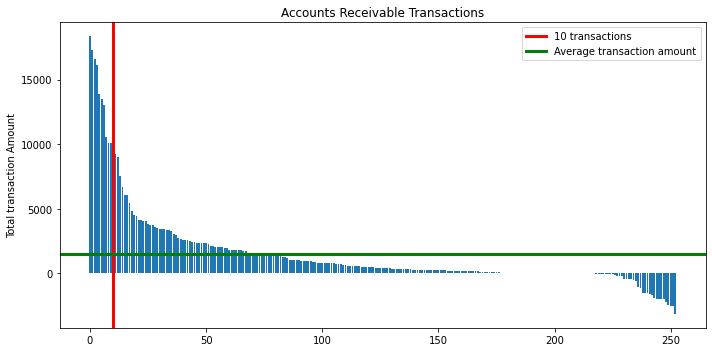

In [5]:
plt.figure(figsize=[10, 5])
plt.bar(np.arange(0, positive_ar.shape[0]), positive_ar)
plt.axvline(x=10, color='red', linewidth=3, label='10 transactions')
plt.axhline(y=positive_ar.mean(), color='green', linewidth=3, label='Average transaction amount')
plt.title('Accounts Receivable Transactions')
plt.ylabel('Total transaction Amount')
plt.legend()
plt.tight_layout()

Using [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=pyplot%20bar#matplotlib.pyplot.bar) again we can model the percent of total transactions side by side.

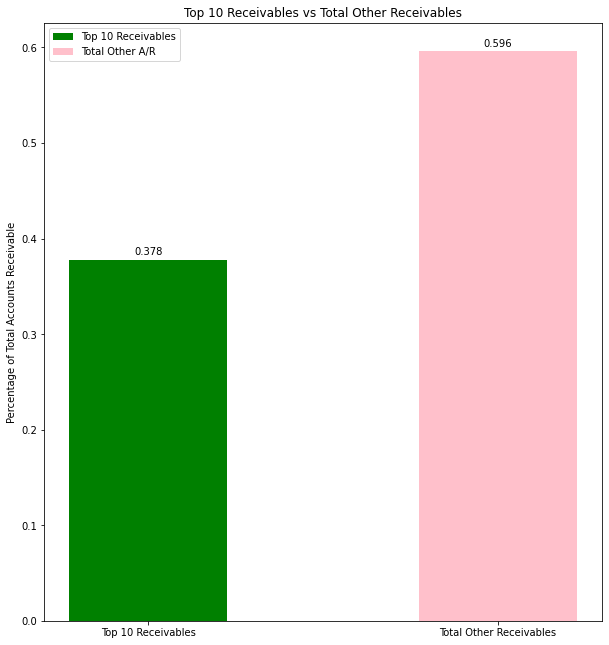

In [6]:
labels=['Top 10 Receivables', 'Total Other Receivables']
fig, ax = plt.subplots(figsize=[10, 11])
width = 0.45  # the width of the bars
rects1 = ax.bar(0, top_10_p, width, label='Top 10 Receivables', color='green')
rects2 = ax.bar(1, other_ar_p, width, label='Total Other A/R', color='pink')

ax.set_ylabel("Percentage of Total Accounts Receivable")
ax.set_title('Top 10 Receivables vs Total Other Receivables')
ax.set_xticks([0, 1], labels)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.legend()
plt.savefig('AccRecBarV.png')

This graph is similar to above, but shows the total dollar amounts relative to the whole. The title also includes the mean transaction dollar value. [matplotlib.pyplot.bar reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=pyplot%20bar#matplotlib.pyplot.bar)

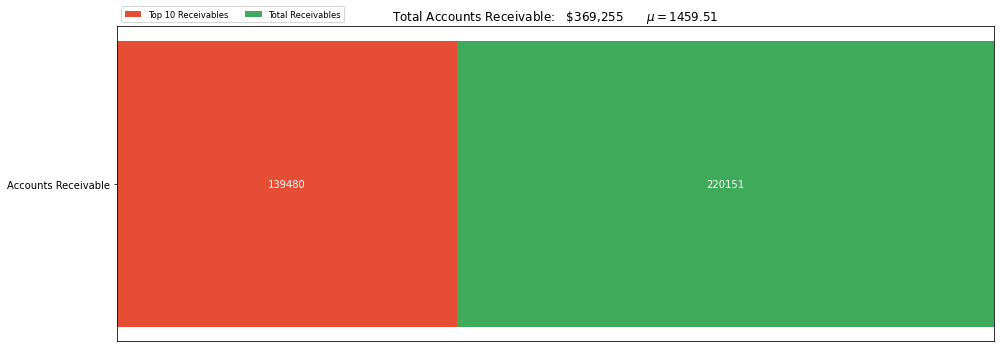

In [7]:
# Adapted from a method in my matplotlib/scipy utils file 

categories = ['Top 10 Receivables', 'Total Receivables']
label = 'Accounts Receivable'
results = [top_10, other_ar]
data = np.array(results)
results_cumsum = data.cumsum()
category_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, data.shape[0]))
fig, ax = plt.subplots(figsize=(14, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data).max())
for i, (colname, color) in enumerate(zip(categories, category_colors)):
    widths = data[i]
    starts = results_cumsum[i] - widths
    rects = ax.barh(label, widths, left=starts, height=0.5, label=colname, color=color)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(categories), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title(f'Total Accounts Receivable:   \${positive_ar.sum():,.0f}      $\mu = ${positive_ar.mean():.2f}')
plt.tight_layout()
plt.savefig('AccRecBarH.png')

Using [matplotlib.pyplot.boxplot](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.boxplot.html) we can display the quartiles of the data as seen in the earlier statistical analysis, as well as the outliers at the top. We show 19 outliers, but there are clear breaks between the top 4, the top 7, and the top 12. The mean is 1456. 

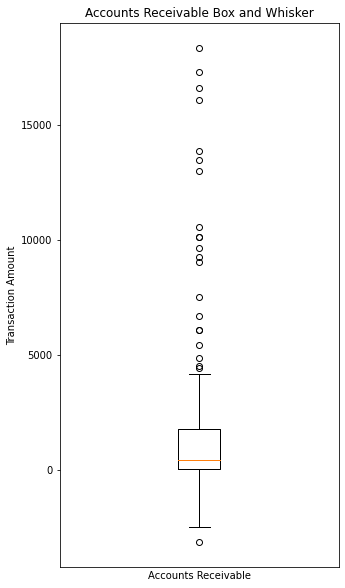

In [8]:
def box_and_whisker(ser, y_label='y label', x_label='x label', title='Title'): # from my matplotlib and scipy utils file
    '''
    Displays box and whisker plot using [matplotlib.pyplot.boxplot](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.boxplot.html)
    @Param: ser is ArrayLike data to model
    @Param: y_label is string label for y axis
    @Param: x_label is string label for x axis
    @Param: Title is string label for figure
    '''
    plt.figure(figsize=[5, 10])
    plt.boxplot(ser)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.title(title)
    plt.savefig('ARb&w.png')

box_and_whisker(positive_ar, y_label='Transaction Amount', x_label='Accounts Receivable', title='Accounts Receivable Box and Whisker')

This visual [uses matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=pyplot%20bar#matplotlib.pyplot.bar) to display the portion of total accounts receivable made up of the top 10 transactions, and also the breakdown proportionately of the top 10 transactions. The legend for the top 10 transactions shows actual dollar amounts. 

Adapted from [this matplotlib example](https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py) to fit the A/R data.

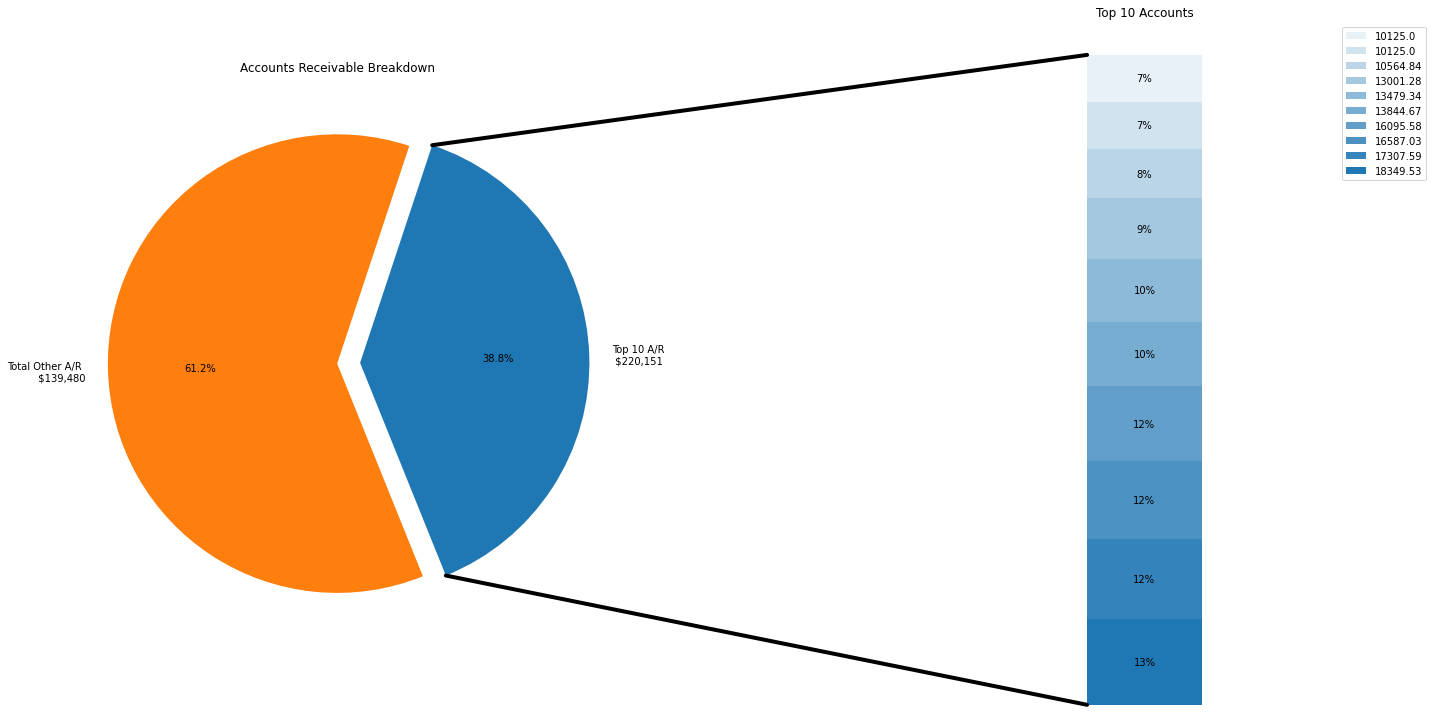

In [9]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [top_10_p, other_ar_p]
labels=[f'Top 10 A/R\n \${positive_ar.iloc[11:].sum():,.0f}', f'Total Other A/R \n \${top_10_ser.sum():,.0f}']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
top10_ratios = [(x / top_10_ser.sum()) for x in top_10_ser]
top10_labels = [x for x in top_10_ser.values]
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(top10_ratios, top10_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label, alpha=0.1 + 0.1 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('Accounts Receivable Breakdown')
ax2.set_title('Top 10 Accounts')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(top10_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData, xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.tight_layout()
plt.savefig('ar_breakdown.png')
plt.show()